<a href="https://colab.research.google.com/github/chohu-boraaaa/Artificial-Intelligence/blob/main/%EA%B3%A0%EC%96%91%EC%9D%B4%EC%99%80_%EA%B0%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

고양이와 개 이미지 분류하기 연습
- 출처 : https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

In [3]:
# 캐글 사이트에서 데이터 다운로드
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-03-02 06:25:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   139MB/s    in 0.5s    

2022-03-02 06:25:59 (139 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os # 파일 시스템 접근
import zipfile # 압축풀기 위한 zipfile 라이브러리
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# 기본경로
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 학습에 사용되는 데이터 경로 설정
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 검증용 데이터 경로 설정
valid_cats_dir = os.path.join(validation_dir, 'cats')
valid_dogs_dir = os.path.join(validation_dir, 'dogs')
print(valid_cats_dir)
print(valid_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [10]:
# 데이터셋 살펴보기
# 'os.listdir'는 파일의 이름을 리스트 형태로 출력
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_cats_fnames)
print(train_dogs_fnames)

['cat.586.jpg', 'cat.533.jpg', 'cat.935.jpg', 'cat.484.jpg', 'cat.517.jpg', 'cat.796.jpg', 'cat.280.jpg', 'cat.190.jpg', 'cat.803.jpg', 'cat.689.jpg', 'cat.481.jpg', 'cat.464.jpg', 'cat.136.jpg', 'cat.283.jpg', 'cat.171.jpg', 'cat.880.jpg', 'cat.520.jpg', 'cat.890.jpg', 'cat.437.jpg', 'cat.870.jpg', 'cat.416.jpg', 'cat.543.jpg', 'cat.393.jpg', 'cat.371.jpg', 'cat.154.jpg', 'cat.279.jpg', 'cat.597.jpg', 'cat.215.jpg', 'cat.82.jpg', 'cat.458.jpg', 'cat.749.jpg', 'cat.559.jpg', 'cat.6.jpg', 'cat.631.jpg', 'cat.414.jpg', 'cat.722.jpg', 'cat.788.jpg', 'cat.558.jpg', 'cat.463.jpg', 'cat.518.jpg', 'cat.519.jpg', 'cat.107.jpg', 'cat.455.jpg', 'cat.547.jpg', 'cat.962.jpg', 'cat.974.jpg', 'cat.98.jpg', 'cat.62.jpg', 'cat.131.jpg', 'cat.502.jpg', 'cat.757.jpg', 'cat.681.jpg', 'cat.427.jpg', 'cat.329.jpg', 'cat.70.jpg', 'cat.824.jpg', 'cat.412.jpg', 'cat.264.jpg', 'cat.465.jpg', 'cat.600.jpg', 'cat.127.jpg', 'cat.195.jpg', 'cat.936.jpg', 'cat.929.jpg', 'cat.187.jpg', 'cat.121.jpg', 'cat.815.jpg', 

In [12]:
# 학습용 데이터, 검증용 데이터 갯수 확인해보기
print('cats training data number : ', len(train_cats_fnames))
print('dogs training data number : ', len(train_dogs_fnames))
print('cats validation data number : ', len(os.listdir(valid_cats_dir)))
print('dogs validation data number : ', len(os.listdir(valid_dogs_dir)))

cats training data number :  1000
dogs training data number :  1000
cats validation data number :  500
dogs validation data number :  500


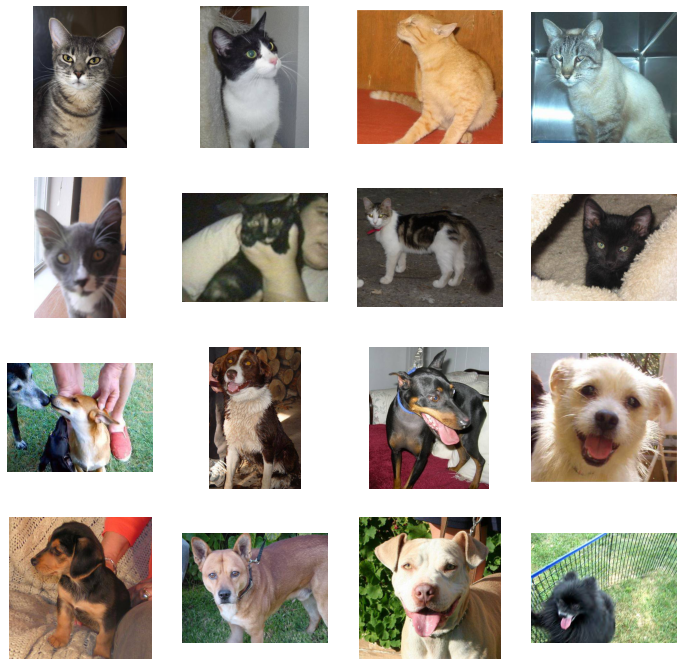

In [17]:
# 이미지 확인하기 -> 코드 하나하나 다시 뜯어보기
%matplotlib inline 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0 
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)
pic_index += 8 # 고양이, 개 각각 8개씩 이미지 출력

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix): # 고양이와 개 이미지 합쳐서 출력되도록 설정
  sp = plt.subplot(nrows, ncols, i+1) # 그림 여러 개 한번에 출력하도록
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()